# Task 3: Feature importance

---
**Question:***
Feature 7 and 8 seem to be important features for the model (with coefficients > 30!). However, taking a closer look, they are both binary, mutually exclusive, and nearly cover the whole dataset. Also they are barely correlated to the outcome by themselves. I would not expect them to both have such a high importance for the model and on top of that both positive! What is going on?


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Sweden

/content/drive/MyDrive/Sweden


In [90]:
!pip install numpy==1.26.4

In [3]:
import pickle
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.linear_model import RidgeCV, LinearRegression, Ridge
from scipy.stats import pearsonr
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sb
from numpy import sqrt, abs, round
import scipy.stats as stats
from scipy.stats import norm

## Load data

In [84]:
import pickle
import os

# Use raw string for the file path
file_path = r'task3_feature-importance_data.pickle'

# Check if the file exists
if not os.path.exists(file_path):
    print(f"File not found: {file_path}")
else:
    try:
        # Open the file and load its contents
        with open(file_path, 'rb') as file:
            X,y = pickle.load(file)
        print("Data loaded successfully")
        print(X,y)
    except PermissionError:
        print("Permission denied. Check file permissions.")
    except pickle.UnpicklingError:
        print("Error unpickling the file. The file may be corrupted or in an incorrect format.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

Data loaded successfully
[[ 0.50150376  0.1918373  -1.56493408 ...  0.          1.
   2.11775118]
 [-1.17424219  0.200018    2.17686493 ...  0.          1.
  -0.52565522]
 [-0.5430083   0.4424491   1.34347838 ...  0.          1.
   0.35031239]
 ...
 [-0.91153544 -0.52830874 -0.54276274 ...  0.          1.
   0.36864613]
 [-0.76190984  0.42332424 -0.0053945  ...  1.          0.
   0.37080869]
 [ 0.66681161 -2.28003641 -0.71604792 ...  1.          0.
   0.52511138]] [-1.05336649e+02  1.64880271e+02 -2.30576832e+00  1.89980160e-01
  7.45520470e+01 -4.82884468e+01 -1.46733172e+02  6.15094209e+00
  1.29698546e+01  1.14753186e+02 -2.43769337e+02  1.34981733e+02
  1.01723444e+02 -3.39403559e+01 -1.71047099e+02  5.29363276e+01
 -1.38381165e+02 -3.92053075e+01  1.21113371e+02  1.32012532e+01
  1.07310282e+02  9.70512950e+01  1.16401713e+02  6.04874592e+01
 -2.01843034e+02  3.05114581e+01 -6.36799156e+01 -6.43569356e+01
  7.76043433e+01 -3.29876962e+02 -1.85148496e+01 -2.47534808e+02
 -9.4222937

In [83]:
#code for loading the data
import pandas as pd
#import numpy as np
import pickle

with open("task3_feature-importance_data.pickle", "rb") as file:
    X,y = pd.read_pickle(file)
print(X,y)

[[ 0.50150376  0.1918373  -1.56493408 ...  0.          1.
   2.11775118]
 [-1.17424219  0.200018    2.17686493 ...  0.          1.
  -0.52565522]
 [-0.5430083   0.4424491   1.34347838 ...  0.          1.
   0.35031239]
 ...
 [-0.91153544 -0.52830874 -0.54276274 ...  0.          1.
   0.36864613]
 [-0.76190984  0.42332424 -0.0053945  ...  1.          0.
   0.37080869]
 [ 0.66681161 -2.28003641 -0.71604792 ...  1.          0.
   0.52511138]] [-1.05336649e+02  1.64880271e+02 -2.30576832e+00  1.89980160e-01
  7.45520470e+01 -4.82884468e+01 -1.46733172e+02  6.15094209e+00
  1.29698546e+01  1.14753186e+02 -2.43769337e+02  1.34981733e+02
  1.01723444e+02 -3.39403559e+01 -1.71047099e+02  5.29363276e+01
 -1.38381165e+02 -3.92053075e+01  1.21113371e+02  1.32012532e+01
  1.07310282e+02  9.70512950e+01  1.16401713e+02  6.04874592e+01
 -2.01843034e+02  3.05114581e+01 -6.36799156e+01 -6.43569356e+01
  7.76043433e+01 -3.29876962e+02 -1.85148496e+01 -2.47534808e+02
 -9.42229374e+01  1.26929754e+02  1.

In [ ]:
!python --version

Python 3.10.12


In [87]:
import numpy as np
import matplotlib.pyplot as plt

## Fit model

In [92]:
model = make_pipeline(StandardScaler(), RidgeCV())
model.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()), ('ridgecv', RidgeCV())])

## Analyse correlations and model coefficients

In [93]:
correlations_r = [pearsonr(X[:, i], y)[0] for i in range(X.shape[1])]
correlations_p = [pearsonr(X[:, i], y)[1] for i in range(X.shape[1])]

In [94]:
df = pd.DataFrame({
        "coef": model["ridgecv"].coef_,
        "correlation r": correlations_r,
        "correlation p": correlations_p},
    index=[f"feature {i}" for i in range(X.shape[1])])
df

,coef,correlation r,correlation p
feature 0,-1.529528,-0.034627,2.739660e-01
feature 1,0.516905,0.009749,7.581588e-01
feature 2,59.958697,0.496610,2.160929e-63
feature 3,0.053120,0.049881,1.149366e-01
feature 4,68.390912,0.554580,1.019725e-81
feature 5,72.159892,0.577704,4.339895e-90
feature 6,-2.134884,-0.021040,5.063249e-01
feature 7,39.197821,-0.009722,7.588043e-01
feature 8,40.087218,0.024289,4.429447e-01
feature 9,1.915710,0.013164,6.775740e-01


In [86]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X1,
    y1,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((700, 10), (300, 10))

In [ ]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: X_ %0d, Score: %.5f' % (i+1,v))

Feature: X_ 1, Score: 0.01032
Feature: X_ 2, Score: 0.01125
Feature: X_ 3, Score: 0.24297
Feature: X_ 4, Score: 0.01068
Feature: X_ 5, Score: 0.32279
Feature: X_ 6, Score: 0.36082
Feature: X_ 7, Score: 0.02632
Feature: X_ 8, Score: 0.00372
Feature: X_ 9, Score: 0.00106
Feature: X_ 10, Score: 0.01006


In [29]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=6fa2498989000884a3519f3e023e6d53655d70bb784d6a0c42233d6ea1024405
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [30]:
import lime
import lime.lime_tabular
 # LIME has one explainer for all the models
explainer = lime.lime_tabular.LimeTabularExplainer(X, verbose=True, mode='regression')

# Choose the 5th instance and use it to predict the results
j = 5
exp = explainer.explain_instance(X[j], model.predict, num_features=3)
# Show the predictions
exp.show_in_notebook(show_table=True)

Intercept 21.876440763519636
Prediction_local [-76.6053334]
Right: -61.38423233745697


In [31]:
print('feature', X.shape)
print('Target', y.shape)

feature (1000, 10)
Target (1000,)


In [ ]:
import lime
import lime.lime_tabular
 # LIME has one explainer for all the models
explainer = lime.lime_tabular.LimeTabularExplainer(X, verbose=True, mode='regression')

# Choose the 5th instance and use it to predict the results
j = 25
exp = explainer.explain_instance(X[j], model.predict, num_features=2)
# Show the predictions
exp.show_in_notebook(show_table=True)

Intercept -24.92566294887483
Prediction_local [57.22090172]
Right: 30.66097542956209


In [85]:
X1=pd.DataFrame(X)
y1=pd.DataFrame(y.T)

In [ ]:
https://machinelearningmastery.com/feature-selection-for-regression-data/

In [ ]:
from sklearn.datasets import make_regression
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler





model = make_pipeline(
    StandardScaler(),
    linear_model.Ridge(fit_intercept=True)
)
model.fit(X, y)
print('new method: ', model.predict(X))

new method:  [ -22.09709242  -55.21511813   88.13620228   12.6803576   265.56532329
  130.91815509  -47.89521848  -99.78794297  -34.20758396 -443.26431438
  127.84993514   83.74235635   54.93256409  323.09817918  -78.8014361
   -3.68818136   74.84222868  177.58494986 -101.26769575  -63.49599312
  159.94128969   99.99366425    6.24434524    9.08707909   22.20588518
  238.30879086   92.65443547   -1.4919619  -255.01677008  184.80310446
 -175.76075297 -153.55894015  -20.04319014  139.13339377  -12.92968222
  103.74804195   13.50686135 -155.65339945  -96.7916892   -37.25656423
   23.51943588   72.62895377 -156.84841568  276.06897426  268.15890225
  302.98621835  -84.12814864  102.74257583   34.30762102   59.60107436]


In the output we can see that X_3 contributes more to the prediction then X_1 so it might be an idea(atleaset if we suspected that from the beginning) to make another model with only X_1 and X_2. We can also think about excluding X_1 because it does not contribute that much to the prediction if we are worried about the dimensionality of our data.:

In [ ]:
# feature 7 and 8 are binary
np.unique(X[:,7]), np.unique(X[:,8])

(array([0., 1.]), array([0., 1.]))

In [ ]:
# feature 7 and 8 are mutually exclusive
((X[:,7] == 1) & (X[:,8] == 1)).sum()

0

In [ ]:
# feature 7 and 8 nearly cover the whole dataset!
((X[:,7] == 1) | (X[:,8] == 1)).sum() / X.shape[0]

0.99

## Tasks

***Question:***
Feature 7 and 8 seem to be important features for the model (with coefficients > 30!). However, taking a closer look, they are both binary, mutually exclusive, and nearly cover the whole dataset. Also they are barely correlated to the outcome by themselves. I would not expect them to both have such a high importance for the model and on top of that both positive! What is going on?
https://www.kaggle.com/code/marcinrutecki/multicollinearity-detection-and-remedies

***ANSWER:***
 Dr. Nudrat Nida:It seems like you're encountering a case of multicollinearity or an issue with the model interpretation. Here are a few possible explanations for the high coefficients of these binary features:

-Multicollinearity: When two or more features are highly correlated, it can cause issues in the model interpretation. Even if features 7 and 8 are mutually exclusive, if they cover almost the entire dataset, the model might find it challenging to distinguish between their effects.

-Model Overfitting: The model might be overfitting to the training data. Overfitting can cause the model to assign high importance to certain features even if they are not as relevant to the outcome. This can be checked by evaluating the model on a validation set or using techniques like cross-validation.

-Interaction Effects: There might be interaction effects between these features and other variables in the dataset. The model might be picking up on these interactions, leading to high coefficients.

-Feature Scaling Issues: If the features are not properly scaled, the model might misinterpret their importance. This is particularly relevant for models that are sensitive to feature scaling, such as logistic regression.

-Data Imbalance: If the dataset is imbalanced, meaning one outcome is significantly more frequent than the other, the model might assign high coefficients to features that correlate with the majority class.

To diagnose and address this issue, you can try the following:

-Check for Multicollinearity: Use Variance Inflation Factor (VIF) to check for multicollinearity among the features. If VIF values are high, it indicates multicollinearity.

-Evaluate on Validation Set: Check the model performance on a validation set to ensure it generalizes well and is not overfitting to the training data.

-Interaction Terms: Explicitly include interaction terms in the model to capture the interactions between features.

-Regularization: Apply regularization techniques such as Lasso (L1) or Ridge (L2) regression to penalize large coefficients and mitigate overfitting.

-Feature Scaling: Ensure that all features are properly scaled, especially when using algorithms that are sensitive to feature scaling.

-Analyze Feature Importances: Use permutation feature importance or SHAP values to understand the contribution of each feature to the model predictions.

By addressing these potential issues, you can gain a better understanding of why features 7 and 8 have high importance and ensure the model's coefficients are interpreted correctly.

In [ ]:
#Step 1: Check for Multicollinearity using VIF

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter

%matplotlib inline


In [24]:
X.size

10000

In [25]:
X.shape

(1000, 10)

In [26]:
Target=pd.DataFrame(y.T)

In [33]:
featureData1=pd.DataFrame(X)

In [34]:
featureData1.head()

,0,1,2,3,4,5,6,7,8,9
0,0.501504,0.191837,-1.564934,-0.672620,0.529294,-0.972069,0.012840,0.0,1.0,2.117751
1,-1.174242,0.200018,2.176865,2.020177,1.595917,-0.405915,-0.039865,0.0,1.0,-0.525655
2,-0.543008,0.442449,1.343478,-0.357639,0.953623,-1.235679,0.844254,0.0,1.0,0.350312
3,-0.670282,-2.082983,-0.769089,-0.329228,1.155118,-0.714204,-0.033821,0.0,1.0,-0.841381
4,1.294075,1.131267,0.228682,-1.032259,0.654715,0.056018,0.629833,1.0,0.0,-1.193127


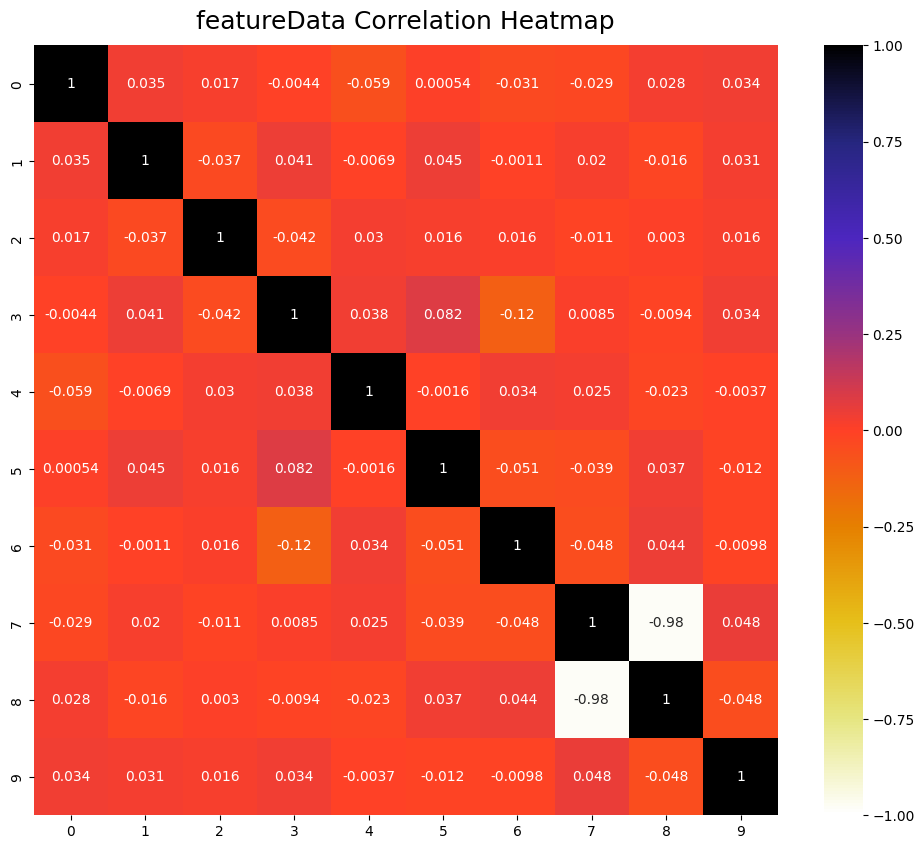

In [38]:
### Plotting the correlation between various columns
plt.figure(figsize = (12, 10))
heatmap = sns.heatmap(featureData1.corr(), vmin = -1, vmax = 1, annot = True,cmap=plt.cm.CMRmap_r)
heatmap.set_title('featureData Correlation Heatmap', fontdict = {'fontsize' : 18}, pad = 12)
plt.show()

<Figure size 1200x1000 with 0 Axes>

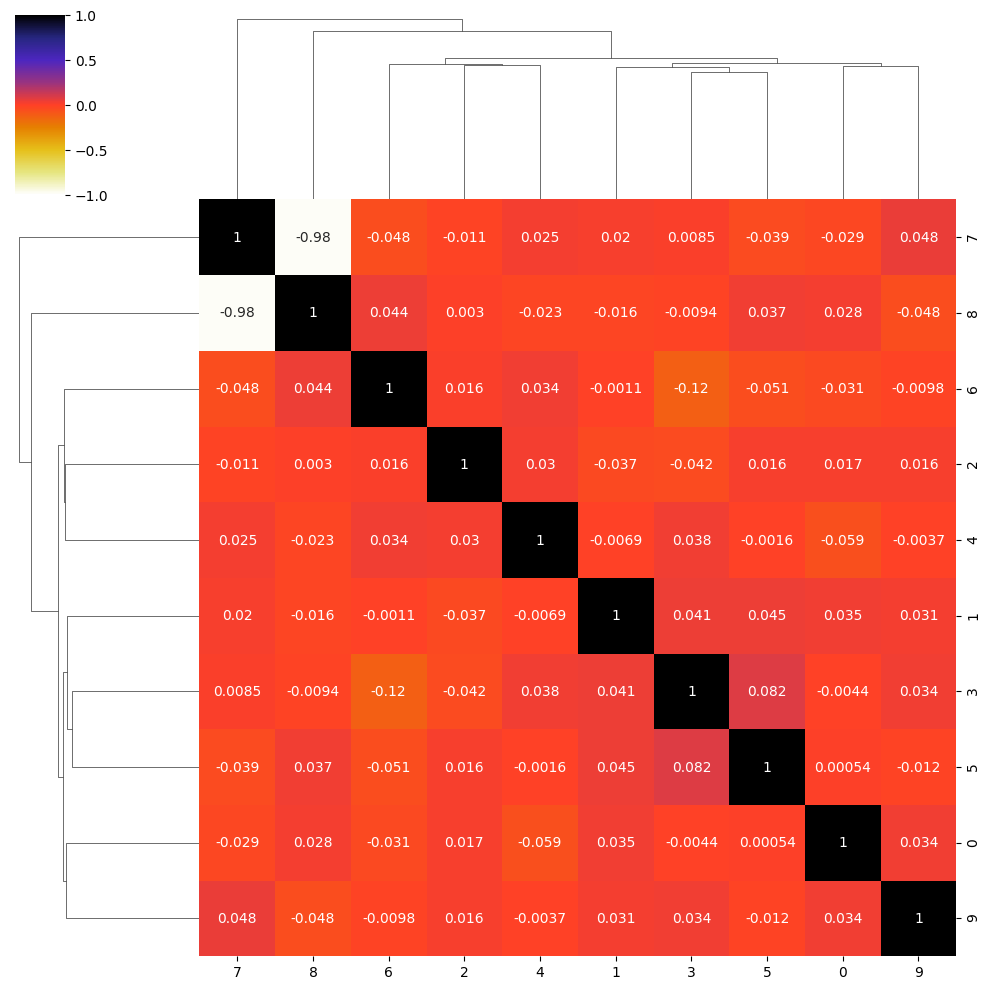

In [39]:
plt.figure(figsize = (12, 10))
clustermap = sns.clustermap(featureData1.corr(), vmin = -1, vmax = 1, annot = True,cmap=plt.cm.CMRmap_r)

In [48]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [50]:
corr_features = correlation(featureData1, 0.09)
len(set(corr_features))

2

In [51]:
corr_features

{6, 8}

In [52]:
corr_features = correlation(featureData1, 0.1)
len(set(corr_features))

2

In [53]:
corr_features

{6, 8}

In [62]:
corr_features = correlation(featureData1, 0.6)

In [63]:
corr_features

{8}

In [ ]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

In [65]:
# the independent variables set
X = featureData1#[['0', '1', '2','3', '4', '5','6', '7', '8','9']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

   Feature       VIF
0        0  1.008272
1        1  1.007383
2        2  1.006090
3        3  1.028024
4        4  1.008587
5        5  1.014090
6        6  1.023162
7        7  1.006296
8        8  1.006470
9        9  1.006285


In [ ]:
#Feature        VIF
3            1.028024
5            1.014090
6            1.023162

#'3', '5' and '6' have high values of VIF, indicating that these three variables are highly correlated. This is expected as the features does influence each other comparatively. Hence, considering these three features together still leads to a model with high multicollinearity.

In [ ]:
#Regression Models performance comparison

In [ ]:
scaled_featureData1 =  featureData1.copy()

In [69]:
from sklearn.preprocessing import StandardScaler

col_names = featureData1.columns
features = featureData1[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

featureData1[col_names] = features

In [71]:
X =featureData1.iloc[:, :-1].values
y = featureData1.iloc[:, -1].values

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [73]:
from sklearn.linear_model import LinearRegression

# Creating and training model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Model making a prediction on test data
y_pred = lm.predict(X_test)
k_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
k_R2 = lm.score(X_test, y_test)

In [74]:
# Predicting Cross Validation Score
cv_lm = cross_val_score(estimator = lm, X = X_train, y = y_train, cv = 10)

# Calculating Adjusted R-squared
r2 = lm.score(X_test, y_test)
# Number of observations is the shape along axis 0
n = X_test.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# Adjusted R-squared formula
lm_adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
lm_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
lm_R2 = lm.score(X_test, y_test)
lmCV_R2 = cv_lm.mean()

print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4) )
print('R2:', round( lm.score(X_test, y_test),4) )
print('Adjusted R2:', round(lm_adjusted_r2, 4) )
print("Cross Validated R2: ", round( cv_lm.mean(),4) )

RMSE: 0.9389
R2: -0.02
Adjusted R2: -0.0517
Cross Validated R2:  -0.0307
